## 任务
### 任务1 数据分析

做的是预测贷款用户是否会逾期。表格中 "status" 是结果标签：0表示未逾期，1表示逾期。  
要求：数据切分方式 - 三七分，其中测试集30%，训练集70%，随机种子设置为2018

- 数据类型的分析
- 无关特征删除
- 数据类型转换
- 缺失值处理
- ……以及你能想到和借鉴的数据分析处理

In [1]:
import warnings
warnings.filterwarnings('ignore')
 
import seaborn as sns
import matplotlib.pyplot as plt
 
import pandas as pd
import numpy as np
 
pd.options.display.max_columns  = 100
 
import os
os.listdir('./data/')

['data.csv']

In [2]:
data = pd.read_csv('./data/data.csv',encoding='gbk')
data.tail(10)

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,student_feature,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,reg_preference_for_trad,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,status,source,first_transaction_day,trans_day_last_12_month,id_name,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_query_time,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_latest_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
4744,11968,1039579,20180507115029481000000388194850,卡号1,0.01,0.96,0,0.89,0.45,0.405,15.0,21.0,16.0,3.0,NaN,6690,0,39.0,20110103.0,206920,220.0,0.60,12020,7.0,3480,0.15,1040,0.55,一线城市,11.0,21.0,11.0,21.0,0.0,2.0,5.0,6.0,62.0,780,9.0,0.0,0,2640,0.0,1,xs,2695.0,90.0,李宇阳,531.0,74.0,15.0,8.0,4.0,17.0,2018-05-02,4.0,9.0,11.0,488.0,78.0,66.0,55.0,9.0,21.0,9.0,12.0,0.0,1.0,15.0,83.0,38.0,0.0,2.0,357.0,2018-02-08,2000.0,77.0,12.0,13.0,3000.0,1691.0,5200.0,77.0,9.0,11.0,8400.0,3344.0,5.0,88.0
4745,11969,3361286,20180507123619864000000388369012,卡号1,0.04,0.96,400,0.79,0.67,0.348,15.0,20.0,117.0,3.0,NaN,9860,0,12.0,20160909.0,63450,98.0,0.55,16140,5.0,1480,0.20,540,0.70,三线城市,7.0,11.0,7.0,11.0,1.0,2.0,2.0,2.0,319007.0,1280,4.0,0.0,0,0,0.0,0,xs,619.0,93.0,孟祥彬,543.0,75.0,17.0,8.0,7.0,25.0,2018-05-06,5.0,13.0,15.0,506.0,71.0,33.0,33.0,1.0,9.0,4.0,5.0,1.0,3.0,14.0,36.0,7.0,1.0,0.0,265.0,2018-04-29,1200.0,65.0,5.0,5.0,2100.0,1280.0,6800.0,82.0,4.0,4.0,7200.0,5850.0,1.0,8.0
4746,11972,692541,20180507125012243000000023109396,卡号1,0.01,0.91,1600,1.04,0.82,0.541,22.0,14.0,10.0,3.0,1.0,17260,0,23.0,20151115.0,274590,247.0,0.40,41850,5.0,10290,0.10,1130,0.50,一线城市,7.0,14.0,7.0,14.0,0.0,1.0,1.0,2.0,1072697.0,1140,4.0,0.0,810,23860,0.0,0,xs,918.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4747,11974,1886940,20180507123811494000000388377504,卡号1,0.02,0.40,0,1.08,0.94,0.394,25.0,20.0,15.0,4.0,NaN,11050,0,17.0,20160925.0,285680,148.0,0.20,43140,8.0,14170,0.05,1690,0.40,境外,4.0,20.0,4.0,20.0,3.0,0.0,2.0,2.0,25.0,2190,10.0,0.0,300,7990,0.0,0,xs,603.0,82.0,鄞佳旺,653.0,75.0,13.0,11.0,2.0,18.0,2018-05-06,4.0,10.0,16.0,631.0,83.0,12.0,11.0,0.0,6.0,5.0,1.0,1.0,4.0,7.0,20.0,1.0,0.0,1.0,324.0,2018-04-15,1100.0,89.0,1.0,1.0,1100.0,1100.0,4500.0,76.0,5.0,6.0,6000.0,3260.0,1.0,22.0
4748,11977,1663311,20180507121025853000000388266701,卡号1,0.09,0.91,0,0.15,0.20,0.159,8.0,36.0,36.0,2.0,NaN,1266

In [3]:
data.shape

(4754, 90)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

In [5]:
# 查看数据类型及对应类型个数
print(data.dtypes.value_counts())
for col in data.columns:
    if data[col].dtypes == 'object':
        print(col)

float64    70
int64      13
object      7
dtype: int64
trade_no
bank_card_no
reg_preference_for_trad
source
id_name
latest_query_time
loans_latest_time


In [6]:
data.describe()

,Unnamed: 0,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,student_feature,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,status,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,4752.000000,4752.000000,1756.000000,4.754000e+03,4754.000000,4752.000000,4.752000e+03,4.754000e+03,4752.000000,4752.000000,4.754000e+03,4752.000000,4754.000000,4752.000000,4754.000000,4650.000000,4746.000000,4746.000000,4746.000000,4746.000000,4328.000000,4738.000000,4738.000000,4738.000000,4.728000e+03,4754.000000,4746.000000,4742.000000,4754.000000,4754.000000,4742.000000,4754.000000,4752.000000,4752.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,21.751263,2.678662,1.001139,1.870201e+04,0.011149,23.033880,2.015109e+07,2.307359e+05,176.109428,0.476926,3.896430e+04,6.572601,9344.350021,0.355745,1237.088767,0.514667,7.134008,20.174673,7.047198,20.649600,0.642329,1.656184,4.529759,5.232165,1.553622e+05,2886.964661,6.055626,0.030789,1321.201094,18958.460244,0.014340,0.250947,1036.274621,89.006944,576.632584,75.998876,11.974382,6.020000,3.784719,16.891236,4.329438,8.771910,12.364270,543.205968,75.438636,35.952210,31.039937,2.308952,12.845412,4.732331,8.113081,0.965896,2.821853,13.926857,43.145614,17.708548,1.224366,1.311420,335.159973,2089.297734,71.992372,8.113081,8.685214,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,16.474916,0.890360,0.033739,5.221783e+04,0.105007,10.057837,1.480487e+04,3.204931e+05,99.687285,0.263769,1.017461e+05,1.390723,27007.597

#### 每个特征的属性值分布情况
- 无关特征：Unnamed: 0、custid、trade_no、bank_card_no、id_name、source
- 特殊特征：student_feature、reg_preference_for_trad
- 日期特征：latest_query_time、loans_latest_time

In [7]:
for col in data.columns:
    if (data[col].nunique()==1):
        print(col)

bank_card_no
source


In [8]:
# 打印以上特征属性值分布情况
special_features = ['Unnamed: 0','custid','trade_no','bank_card_no','id_name',
                    'student_feature','reg_preference_for_trad','source','latest_query_time','loans_latest_time']
for col in special_features:
    print('{}:{}\r\n'.format(col,data[col].value_counts()))

Unnamed: 0:2047     1
6774     1
8825     1
637      1
4735     1
10880    1
8833     1
6786     1
645      1
9143     1
4743     1
10888    1
8841     1
4747     1
10892    1
2704     1
6802     1
2680     1
8821     1
8807     1
6770     1
10902    1
605      1
6750     1
10848    1
609      1
4707     1
8805     1
6758     1
2664     1
        ..
3371     1
11567    1
9178     1
7473     1
1330     1
3379     1
5428     1
7477     1
1334     1
3383     1
7481     1
7461     1
5412     1
11444    1
5392     1
3331     1
3335     1
1290     1
9568     1
9486     1
10317    1
11308    1
3359     1
10945    1
3347     1
7445     1
1302     1
3355     1
7453     1
8192     1
Name: Unnamed: 0, Length: 4754, dtype: int64

custid:284669     1
1077931    1
309934     1
1045167    1
139340     1
2396855    1
1403580    1
2071230    1
2620098    1
1569475    1
1837764    1
328389     1
2411208    1
631501     1
2661070    1
2609871    1
2665168    1
815491     1
1881943    1
2691859    1
56745

#### 初步结论¶
(1) 数据集共有4754个样本,特征维度为90,其中float64类型70个,int64类型13个,object类型7个  
(2) 通过info发现，数据集除了'student_feature'存在大量缺失值外，在整体表现是相当完整  
(3) 大部分特征数据方差很大，存在拖尾现象  
(4) 初步分析得到的无关特征有['Unnamed: 0','custid','trade_no','bank_card_no','id_name','student_feature','source']、需要进行类型转换的特征有：['reg_preference_for_trad']、日期特征有：['latest_query_time','loans_latest_time']

后续还需要通过寻找特征相关性和特征组合对特征进行进行选择和提取

In [6]:
drop_features = ['Unnamed: 0','custid','trade_no','bank_card_no','id_name',
                    'student_feature','source','latest_query_time','loans_latest_time']
data = data.drop(drop_features,axis=1)
print(data.dtypes.value_counts())

float64    69
int64      11
object      1
dtype: int64


### 数据类型转换
将城市等级：'reg_preference_for_trad'进行类型转换

In [7]:
data['reg_preference_for_trad'].value_counts()

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64

In [8]:
i = 'reg_preference_for_trad'
data[i] = data[i].map(dict(zip(data[i].unique(), range(1, data[i].nunique()+1))))
data['reg_preference_for_trad'].value_counts()

1.0    3403
2.0    1064
3.0     150
4.0     131
5.0       4
Name: reg_preference_for_trad, dtype: int64

### 缺失值统计和处理
缺失值缺失比例不是很大，而且基本都是数值型

In [10]:
# 查看数据类型及对应类型个数
print(data.dtypes.value_counts())
for col in data.columns:
    if data[col].dtypes == 'object':
        print(col)

float64    70
int64      11
dtype: int64


In [9]:
data.isnull().sum(axis=0).sort_values(ascending=False) / data.shape[0]

cross_consume_count_last_1_month              0.089609
latest_one_month_apply                        0.063946
query_finance_count                           0.063946
latest_six_month_apply                        0.063946
query_sum_count                               0.063946
query_cash_count                              0.063946
latest_three_month_apply                      0.063946
query_org_count                               0.063946
apply_credibility                             0.063946
apply_score                                   0.063946
latest_query_day                              0.063946
latest_one_month_loan                         0.062474
loans_score                                   0.062474
loans_credibility_behavior                    0.062474
loans_count                                   0.062474
loans_settle_count                            0.062474
loans_overdue_count                           0.062474
loans_org_count_behavior                      0.062474
consfin_or

In [13]:
data = data.fillna(data.mean())

### 相关性

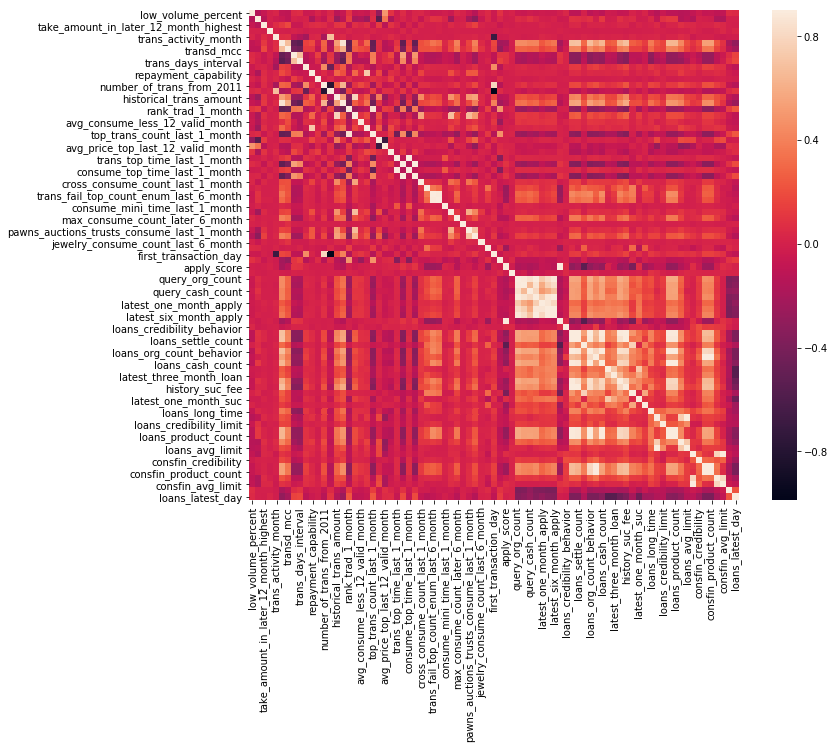

In [15]:
#Correlation map to see how features are correlated with SalePrice
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [16]:
corr_matrix = data.corr()
corr_matrix['status'].sort_values(ascending=False)

status                                        1.000000
trans_fail_top_count_enum_last_1_month        0.332068
history_fail_fee                              0.310108
loans_overdue_count                           0.270469
latest_one_month_fail                         0.249290
rank_trad_1_month                             0.147247
trans_fail_top_count_enum_last_6_month        0.133401
top_trans_count_last_1_month                  0.117105
trans_fail_top_count_enum_last_12_month       0.117094
trans_day_last_12_month                       0.078887
avg_price_top_last_12_valid_month             0.071126
latest_six_month_loan                         0.060625
latest_query_day                              0.057387
query_cash_count                              0.053042
low_volume_percent                            0.051843
latest_three_month_loan                       0.051436
loans_count                                   0.046716
middle_volume_percent                         0.041129
first_tran

#### 数据切分

In [18]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, random_state=2018)